La idea de este play ground es explorar la información de algunos dataset de este link:https://exoplanetarchive.ipac.caltech.edu/bulk_data_download/?fbclid=IwAR1GDR1g9FTuhdx1K7oOGO0Vh0I3QFGDyTSwOF15rF0hLnZuznXaj86XEr0

para asi ver cuales sirve y cuales no. Tambien se explorara la aplicación de transformaciones para dejar las curvas de luz bonitas.

In [1]:
import numpy as np
#from astrobase import periodbase, checkplot
#from astrobase.hatsurveys import hatlc
from IPython.display import display, Image
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [2]:
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC, median_view, mask_values,process_found, generate_representation

# Funciones Genericas

In [3]:
import glob

def generate_path_list(path,extension):    
    fits_list = []
    for fits in glob.glob(path+'*.' + extension):
        fits_list.append(fits)
    print('Se encontraron %i %s'%(len(fits_list),extension))
    return fits_list

# SuperWasp

In [23]:
from astropy.io import ascii
path_list = generate_path_list('./SW_play_data_100_fits/Confirmed/','tbl')
n_sampled = np.random.randint(0,len(path_list))
dat = ascii.read(path_list[n_sampled])  
df = dat.to_pandas()
df.head()

Se encontraron 45 tbl


,TMID,FLUX2,FLUX2_ERR,TAMFLUX2,TAMFLUX2_ERR,IMAGEID,CCDX,CCDY,FLAG,HJD,MAG2,MAG2_ERR,TAMMAG2,TAMMAG2_ERR
0,10640093,17.62810,0.239543,17.15449,0.250039,102200405030332550,17796,575,32,2.453129e+06,11.88449,0.014754,11.91406,0.015825
1,10640453,17.50523,0.240826,17.02185,0.252168,102200405030338550,17773,537,32,2.453129e+06,11.89208,0.014937,11.92248,0.016085
2,10640813,17.33841,0.239273,16.86516,0.250482,102200405030344550,17755,521,32,2.453129e+06,11.90248,0.014983,11.93252,0.016125
3,10641172,17.49224,0.235906,17.02154,0.246396,102200405030350550,17726,566,32,2.453129e+06,11.89289,0.014643,11.92250,0.015717
4,10641532,17.64371,0.234155,17.14572,0.248320,102200405030356550,17705,548,32,2.453129e+06,11.88352,0.014409,11.91461,0.015725


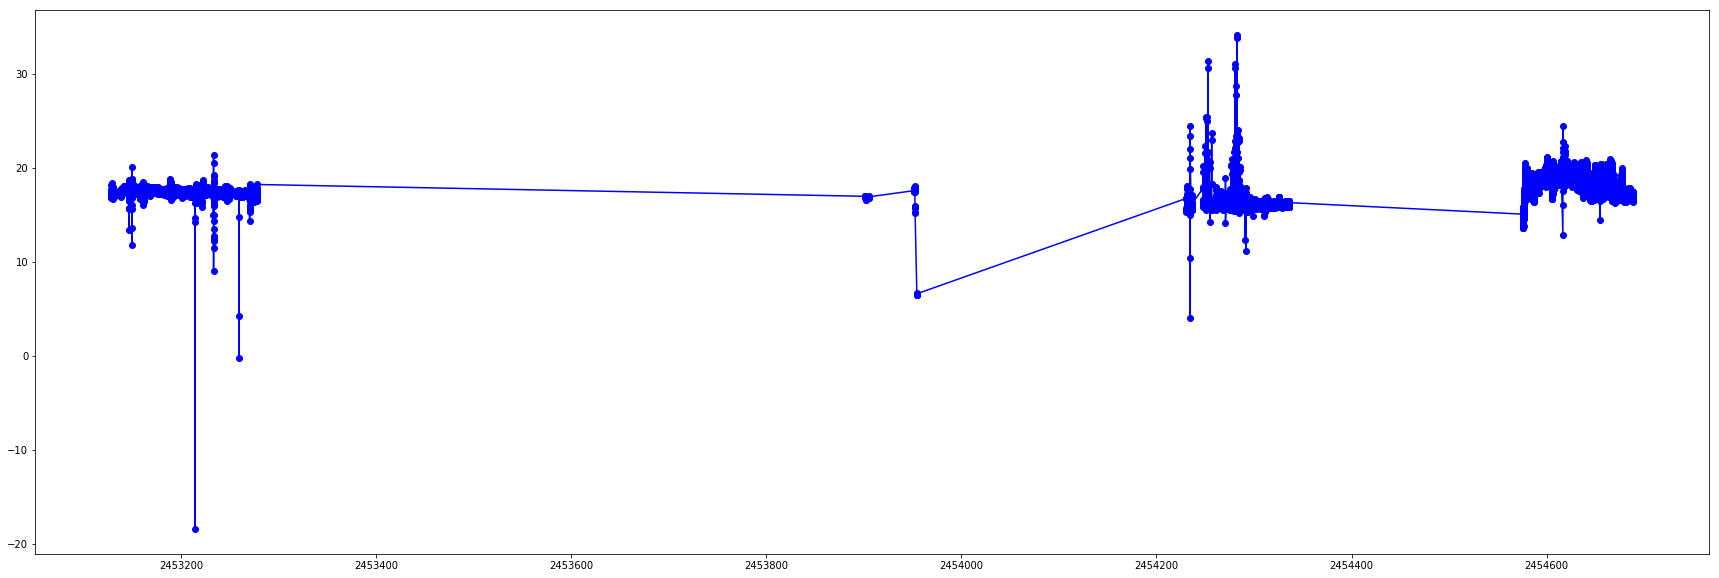

In [24]:
plt.figure(figsize=(30,10))
plt.plot(df['HJD'], df["FLUX2"],'bo-')
plt.show()

In [25]:
#GET UNIFORM SAMPLING
new_time, new_flux = mask_values(df["HJD"], df['FLUX2'])

#GET VIEW OF KEPLER (30 min sampling rate)
time_keplerview, flux_keplerview = median_view(new_time, new_flux, bin_width=0.020433) # el de kepler
time_keplerview

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.000371 (JD) --- 0.534240 (mins)
Old length: 17594
New length: 4204627
percentaje nulls/nans: 0.995816
***************Median view is being done...
Old length: 4204627
New length: 76343


/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


array([2453128.65942749, 2453128.68001798, 2453128.70042297, ...,
       2454688.51342444, 2454688.53382943, 2454688.55441992])

In [26]:
#lo de arriba ahora en funcion
time_rep, lc_rep = generate_representation(df["HJD"], df["FLUX2"], sample_time=0, kepler_view=True)

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.000371 (JD) --- 0.534240 (mins)
Old length: 17594
New length: 4204627
percentaje nulls/nans: 0.995816
***************Median view is being done...
Old length: 4204627
New length: 76341


/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


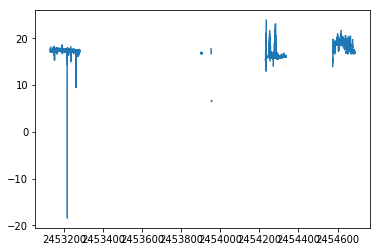

In [27]:
plt.plot(time_rep, lc_rep)

/users/fmena/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


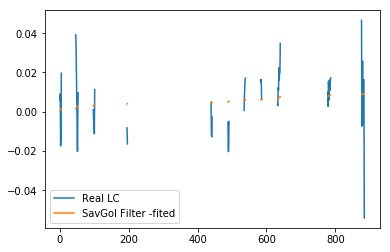

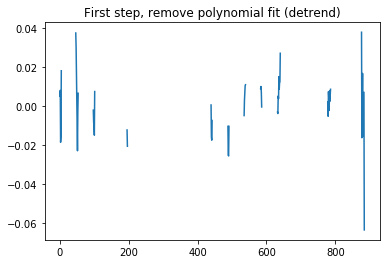

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 24 values


/users/fmena/PIIC19/code/pre_process.py:123: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/users/fmena/PIIC19/code/pre_process.py:123: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


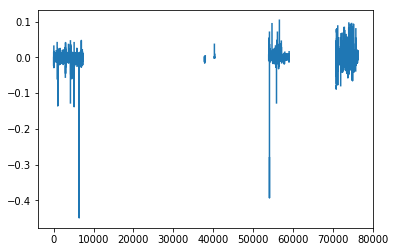

In [28]:
#DETREND AND MEDIAN FILTER
flux_processed = clean_LC(lc_rep )
plt.plot(flux_processed)

# Keppler

In [15]:
from astropy.io import ascii
path_list = generate_path_list('./KL_play_data_100_fits/confirmed/','tbl')
n_sampled = np.random.randint(0,len(path_list))
dat = ascii.read(path_list[n_sampled])  
df = dat.to_pandas()
df.head()

Se encontraron 45 tbl


,TIME,TIME_BJD,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,...,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,1373.487809,2.456206e+06,0.002310,61886,44910.062,6.113721,819.34515,0.311383,NaN,NaN,...,NaN,NaN,NaN,NaN,338.42397,0.000158,493.62370,0.000159,0.017959,-0.010597
1,1373.508242,2.456207e+06,0.002309,61887,44896.746,6.112990,820.36255,0.310944,49940.422,6.788914,...,NaN,NaN,NaN,NaN,338.42404,0.000158,493.62369,0.000159,0.018162,-0.010516
2,1373.528675,2.456207e+06,0.002309,61888,44890.074,6.112637,819.38263,0.311537,49934.770,6.789156,...,NaN,NaN,NaN,NaN,338.42367,0.000158,493.62394,0.000159,0.017791,-0.010697
3,1373.549108,2.456207e+06,0.002308,61889,44903.598,6.113337,820.14197,0.310994,49948.539,6.791480,...,NaN,NaN,NaN,NaN,338.42393,0.000158,493.62355,0.000159,0.018088,-0.010563
4,1373.569541,2.456207e+06,0.002308,61890,44887.680,6.112663,820.44958,0.311451,49932.219,6.788974,...,NaN,NaN,NaN,NaN,338.42403,0.000158,493.62373,0.000159,0.017935,-0.010645


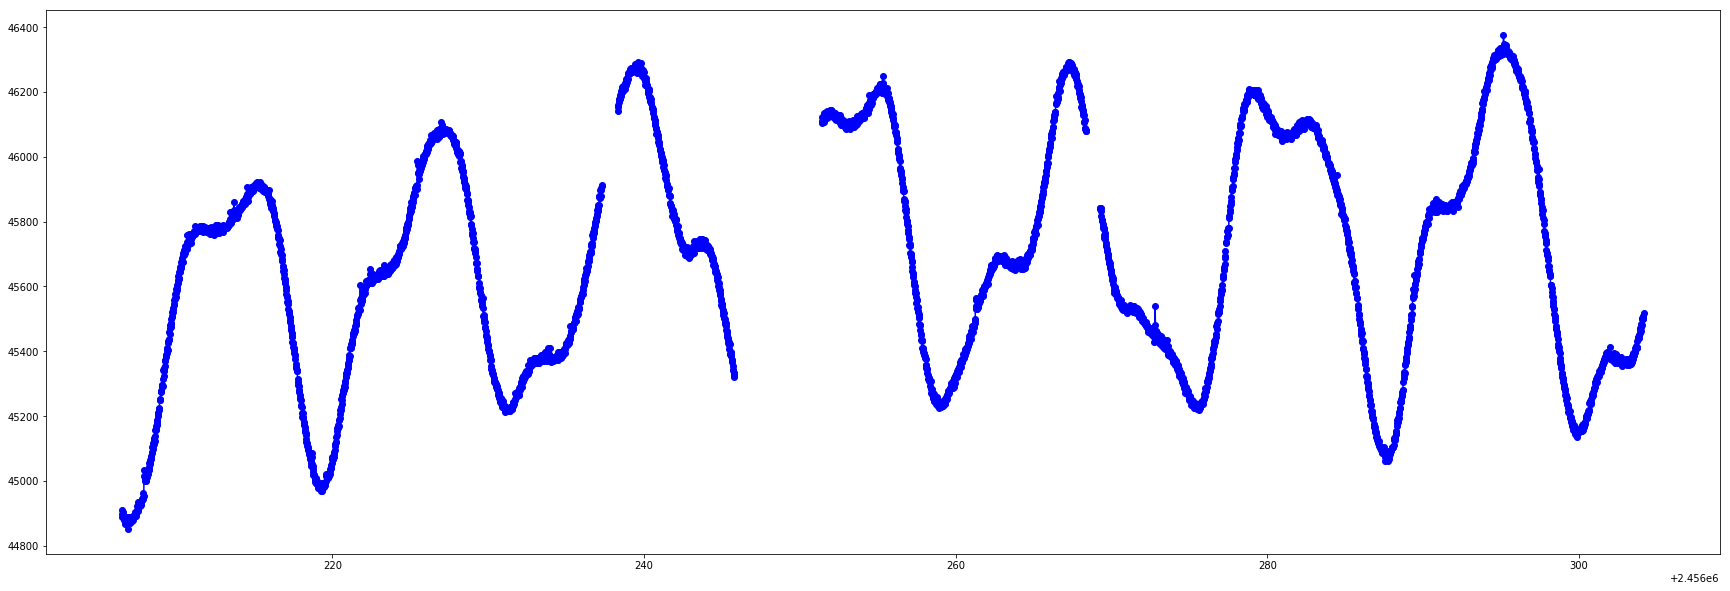

In [16]:
plt.figure(figsize=(30,10))
plt.plot(df['TIME_BJD'], df["SAP_FLUX"],'bo-')
plt.show()

In [17]:
#GET UNIFORM SAMPLING
new_time, new_flux = mask_values(df["TIME_BJD"], df['SAP_FLUX'])

#GET VIEW OF KEPLER (30 min sampling rate)
time_keplerview, flux_keplerview = median_view(new_time, new_flux, bin_width=0.020433) # el de kepler
time_keplerview

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.422944 (mins)
Old length: 4780
New length: 4780
Assuming uniform sampling
***************Median view is being done...
Old length: 4780
New length: 4779
Nothing to be done


array([2456206.4878091 , 2456206.5082417 , 2456206.5286743 , ...,
       2456304.09433844, 2456304.11477104, 2456304.13520364])

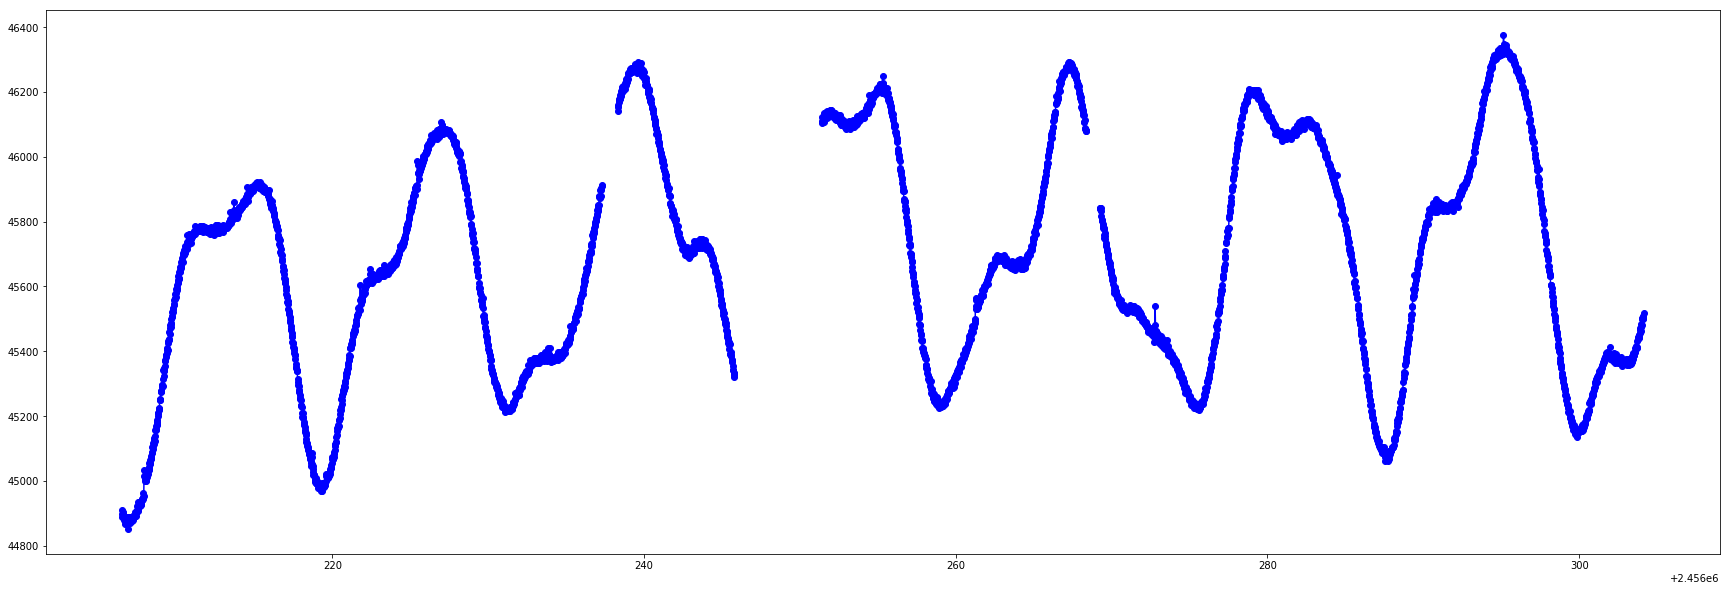

In [18]:
plt.figure(figsize=(30,10))
plt.plot(time_keplerview, flux_keplerview, 'bo-')

/users/fmena/.local/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


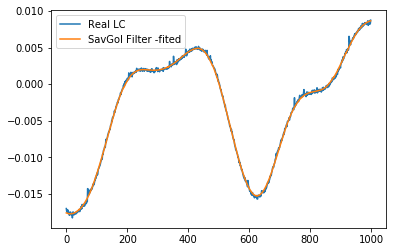

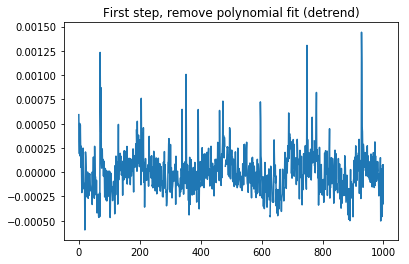

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 15 values


/users/fmena/PIIC19/code/pre_process.py:123: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/users/fmena/PIIC19/code/pre_process.py:123: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


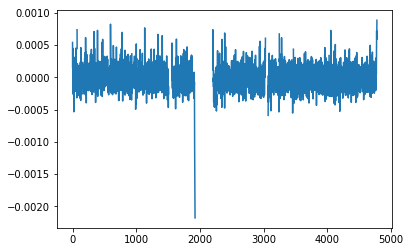

In [19]:
#DETREND AND MEDIAN FILTER
flux_processed = clean_LC(flux_keplerview )
plt.plot(flux_processed)

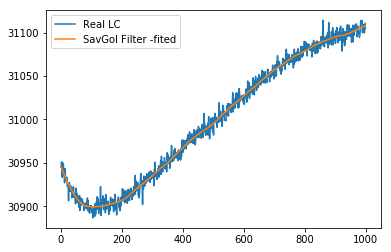

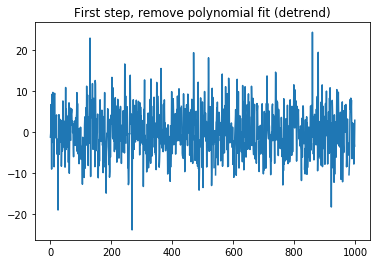

/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


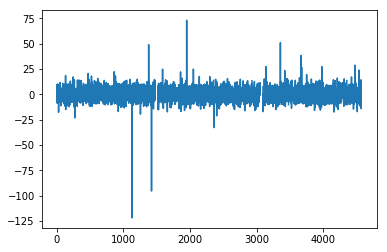

In [77]:
aux  = process_found(flux_keplerview, kernel_median=25, kernel_pol=151, plot_show=True)
plt.plot(aux)

# KELT

In [17]:
path_list = generate_path_list('./KELT/','tbl')
n_sampled = np.random.randint(0,len(path_list))
dat = ascii.read(path_list[n_sampled])  
df = dat.to_pandas()
df.head()

Se encontraron 91 tbl


,TIME,MAG,MAG_ERR
0,2.454035e+06,14.30530,0.00779
1,2.454035e+06,14.29033,0.00711
2,2.454035e+06,14.31446,0.00725
3,2.454035e+06,14.29683,0.00740
4,2.454035e+06,14.29035,0.00746


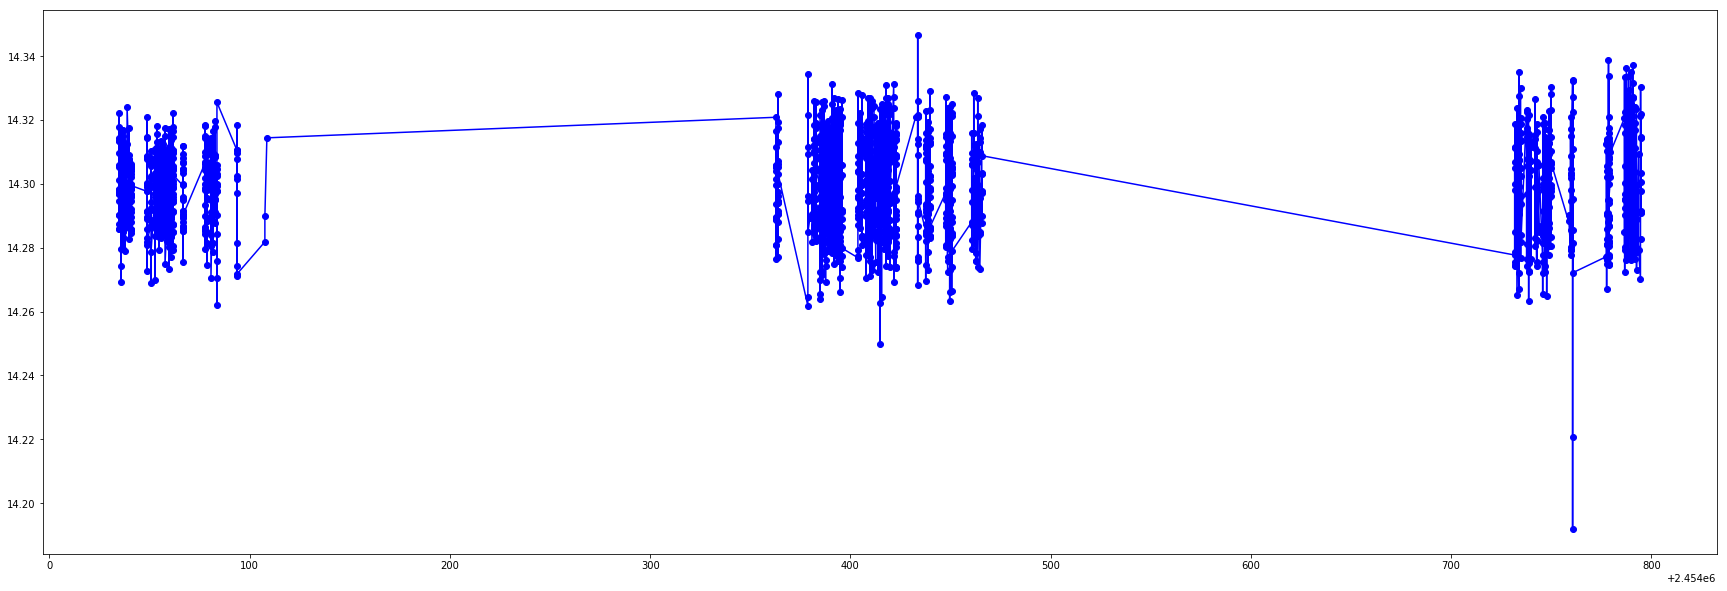

In [18]:
plt.figure(figsize=(30,10))
plt.plot(df['TIME'], df["MAG"],'bo-')
plt.show()

In [19]:
#GET UNIFORM SAMPLING
new_time, new_flux = mask_values(df["TIME"], df['MAG'])

#GET VIEW OF KEPLER (30 min sampling rate)
time_keplerview, flux_keplerview = median_view(new_time, new_flux, bin_width=0.020433) # el de kepler
time_keplerview

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.002096
(in minutes): 3.018240
Old length: 1792
New length: 362596
percentaje nulls/nans: 0.995058
***************Median view is being done...
Old length: 362596
New length: 37195


/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


array([ 2454034.706762  ,  2454034.727722  ,  2454034.748682  , ...,
        2454794.64514423,  2454794.66610423,  2454794.68601623])

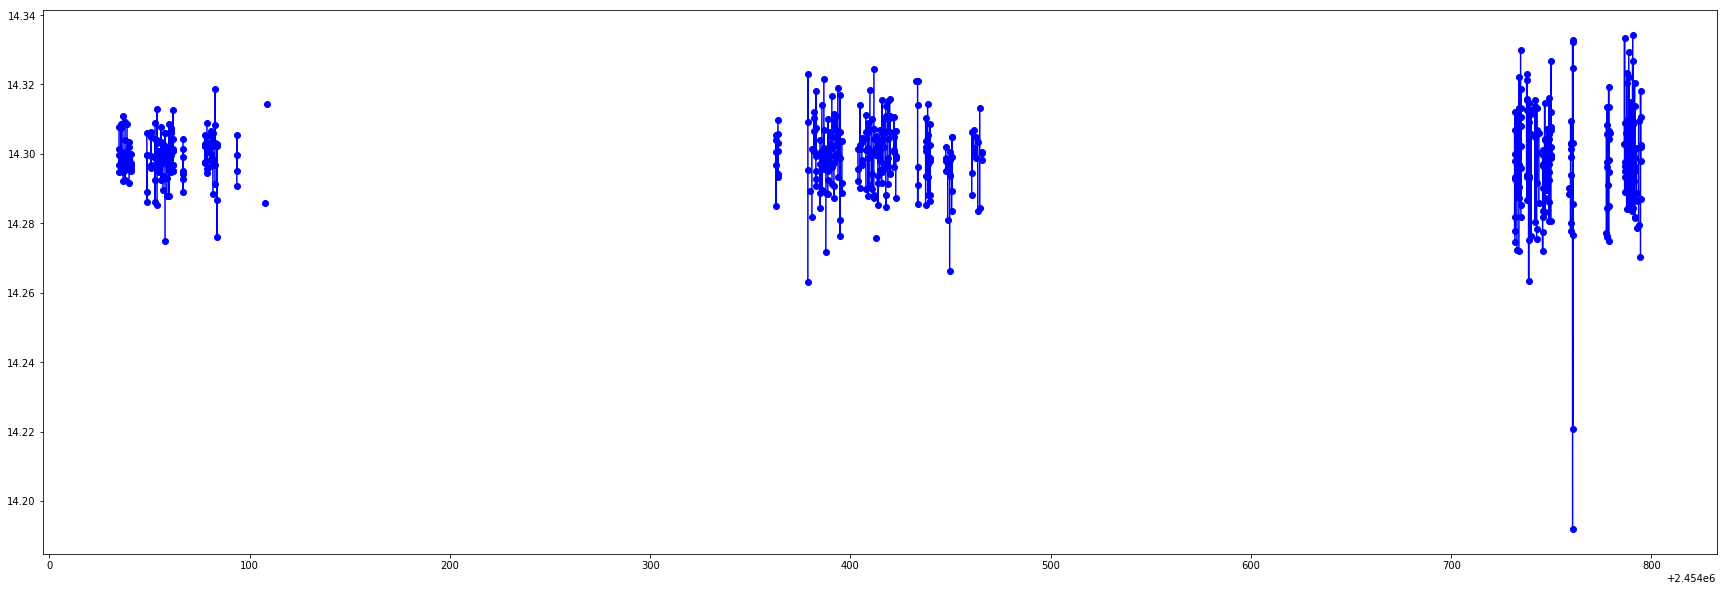

In [20]:
plt.figure(figsize=(30,10))
plt.plot(time_keplerview, flux_keplerview, 'bo-')

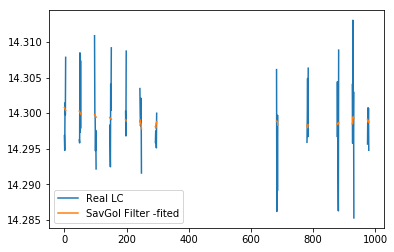

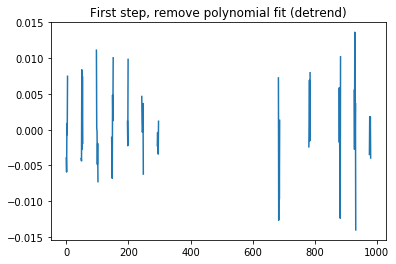

/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Clean done (remove outliers iterativetly), erase 0 values


/home/fmena/Desktop/Postgrado/Astro/PIIC19/code/pre_process.py:114: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/home/fmena/Desktop/Postgrado/Astro/PIIC19/code/pre_process.py:114: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


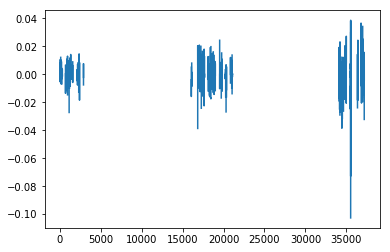

In [21]:
#DETREND AND MEDIAN FILTER
flux_processed = clean_LC(flux_keplerview, kernel_median=25, kernel_pol=49 )
plt.plot(flux_processed)

# PHOTOMETRIC

In [64]:
path_list = generate_path_list('./PHOTOMETRIC/','tbl')    
n_sampled = np.random.randint(0,len(path_list))
dat = ascii.read(path_list[n_sampled])  
df = dat.to_pandas()

time_column = df.columns[0]
mag_column = df.columns[1]
df.head()

Se encontraron 92 tbl


,HJD,Normalized_Flux,Normalized_Flux_Uncertainty,Accepted
0,2.453671e+06,0.987927,0.00005,1
1,2.453671e+06,0.987883,0.00005,1
2,2.453671e+06,0.987394,0.00005,1
3,2.453671e+06,0.987020,0.00005,1
4,2.453671e+06,0.986546,0.00005,1


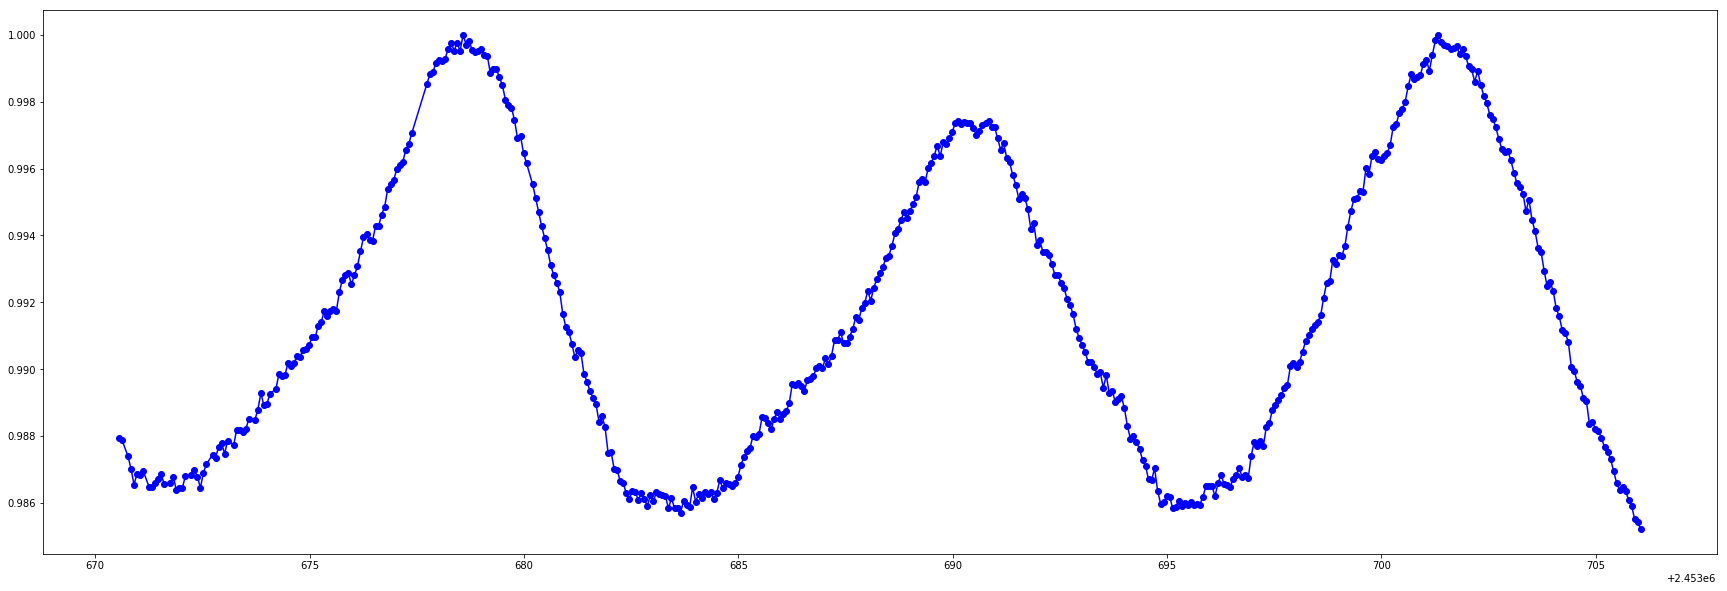

In [65]:
plt.figure(figsize=(30,10))
plt.plot(df[time_column], df[mag_column],'bo-')
plt.show()

In [66]:
#GET UNIFORM SAMPLING
new_time, new_flux = mask_values(df[time_column], df[mag_column])

#GET VIEW OF KEPLER (30 min sampling rate)
time_keplerview, flux_keplerview = median_view(new_time, new_flux, bin_width=0.020433) # el de kepler
time_keplerview

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.070420
(in minutes): 101.404800
Old length: 492
New length: 505
percentaje nulls/nans: 0.025743
***************Median view is being done...
Old length: 505
New length: 1737
Nothing to be done


array([ 2453670.55302   ,  2453670.62344   ,  2453670.69386   ,
        2453670.76428   ,  2453670.8347    ,  2453670.90512   ,
        2453670.97554   ,  2453671.04596   ,  2453671.11638   ,
        2453671.1868    ,  2453671.25722   ,  2453671.32764   ,
        2453671.39806   ,  2453671.46848   ,  2453671.5389    ,
        2453671.60932   ,  2453671.67974   ,  2453671.75016   ,
        2453671.82058   ,  2453671.891     ,  2453671.96142   ,
        2453672.03184   ,  2453672.10225999,  2453672.17267999,
        2453672.24309999,  2453672.31351999,  2453672.38393999,
        2453672.45435999,  2453672.52477999,  2453672.59519999,
        2453672.66561999,  2453672.73603999,  2453672.80645999,
        2453672.87687999,  2453672.94729999,  2453673.01771999,
        2453673.08813999,  2453673.15855999,  2453673.22897999,
        2453673.29939999,  2453673.36981999,  2453673.44023999,
        2453673.51065999,  2453673.58107999,  2453673.65149999,
        2453673.72191999,  2453673.79233

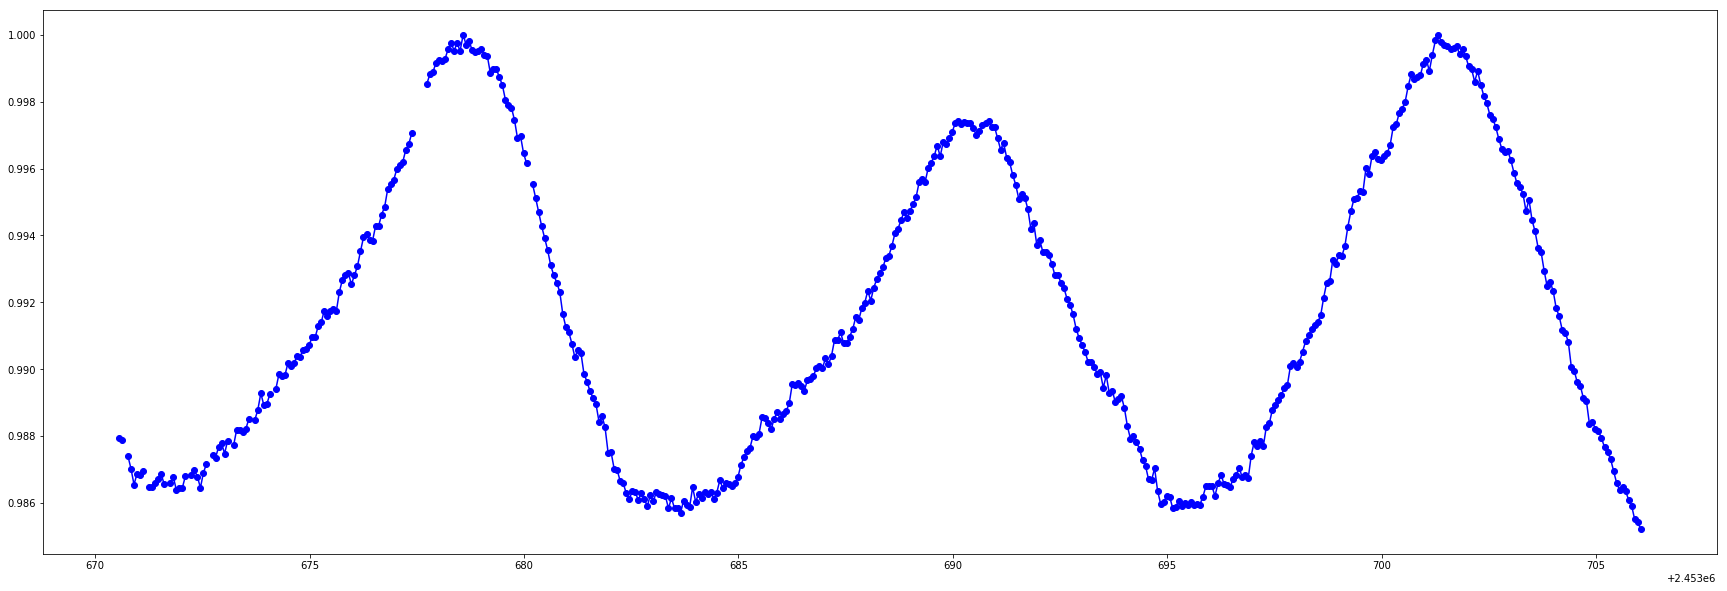

In [67]:
plt.figure(figsize=(30,10))
plt.plot(time_keplerview, flux_keplerview, 'bo-')

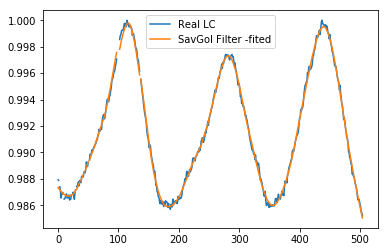

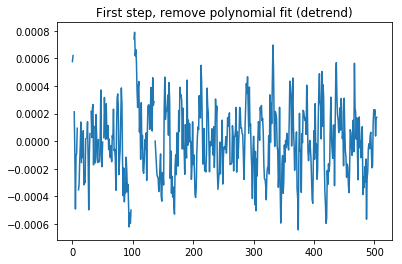

Clean done (remove outliers iterativetly), erase 0 values


/home/fmena/Desktop/Postgrado/Astro/PIIC19/code/pre_process.py:114: RuntimeWarning: invalid value encountered in less
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)
/home/fmena/Desktop/Postgrado/Astro/PIIC19/code/pre_process.py:114: RuntimeWarning: invalid value encountered in greater
  mask_nan = (f_clean - med < -sigm_low * MAD) | (f_clean - med > sigm_up * MAD)


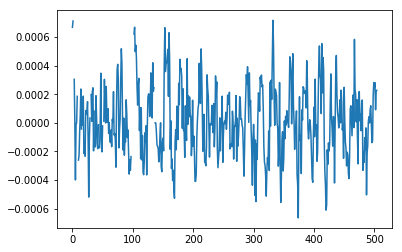

In [68]:
#DETREND AND MEDIAN FILTER
flux_processed = clean_LC(flux_keplerview, kernel_median=25, kernel_pol=49 )
plt.plot(flux_processed)